<a href="https://colab.research.google.com/github/vaishaliraut/DeepLearningDemo/blob/main/MulticlassClassification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multiclass classification with Keras
### number of classes is more than 2 then it is multiclass classification problem

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the dataset

In [2]:
import pandas as pd
url1 ="https://raw.githubusercontent.com/vaishaliraut/DeepLearningDemo/main/mobile_train.csv"

df = pd.read_csv(url1)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Step 2 : Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['price_range'].unique()

array([1, 2, 3, 0])

### Step 3 : Seperate X and Y

In [7]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


### Step 4 : Preprcessing on X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [13]:
X.shape

(2000, 20)

### Step 5 : Apply train and test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [16]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
353,-0.128653,-0.990050,-1.253064,-1.019184,0.619880,0.957886,-1.325520,-0.006069,-0.063548,1.521249,1.003414,-0.834197,-0.614489,0.404613,1.589078,2.579151,1.462493,0.559641,-1.006018,-1.014099
1333,1.669628,-0.990050,1.688833,-1.019184,1.080671,-1.043966,-0.994781,-0.352878,1.575296,1.084046,1.333295,-0.793626,-0.693176,-0.745267,-1.022389,-1.094526,-0.551204,0.559641,0.994018,-1.014099
905,-0.567980,1.010051,0.585621,-1.019184,-0.071307,-1.043966,-0.829411,-1.046495,0.727618,-0.664768,1.498235,-0.877022,0.329755,1.630107,1.351672,0.283103,1.462493,0.559641,0.994018,-1.014099
1289,-1.419319,1.010051,-1.253064,0.981177,0.619880,-1.043966,1.430640,-0.006069,-0.289595,0.209639,-0.316108,0.847234,1.635035,-0.201218,0.402047,-0.176107,-1.100394,0.559641,-1.006018,-1.014099


In [17]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [18]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [19]:
xtrain.shape

(1600, 20)

In [20]:
xtest.shape

(400, 20)

### This is applicable for multiclass classification only, get onehotencoding for target features

In [26]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [22]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [23]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [27]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [30]:
ytrain_cat.shape[1]

4

In [31]:
ytest_cat.shape[1]

4

### Step 6 : Build the neural network

In [32]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping


In [33]:
# Initialize the model
model =Sequential()

# Crate a input layer
model.add(Input(shape=(xtrain.shape[1], )))

# Create Dense layer 1
model.add(Dense(64, activation='relu'))

# Add dropout layer
model.add(Dropout(0.2))

# Create Dense layer 2
model.add(Dense(32, activation='relu'))

# Add Dropout layer
model.add(Dropout(0.1))

# Output layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
#add early stopping
es = EarlyStopping(monitor='val_loss', patience=15)

In [38]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2, epochs=200,callbacks=[es] )

Epoch 1/200
40/40 [==============================] - 3s 9ms/step - loss: 1.4477 - accuracy: 0.3109 - val_loss: 1.3318 - val_accuracy: 0.3281
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 1.2848 - accuracy: 0.4008 - val_loss: 1.1838 - val_accuracy: 0.4844
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 1.1185 - accuracy: 0.5164 - val_loss: 1.0203 - val_accuracy: 0.5656
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.9551 - accuracy: 0.5984 - val_loss: 0.8604 - val_accuracy: 0.6594
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.8229 - accuracy: 0.6555 - val_loss: 0.7338 - val_accuracy: 0.7063
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.7125 - val_loss: 0.6343 - val_accuracy: 0.7594
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6177 - accuracy: 0.7555 - val_loss: 0.5605 - val_accuracy: 0.7812
Epoch 8/200
4

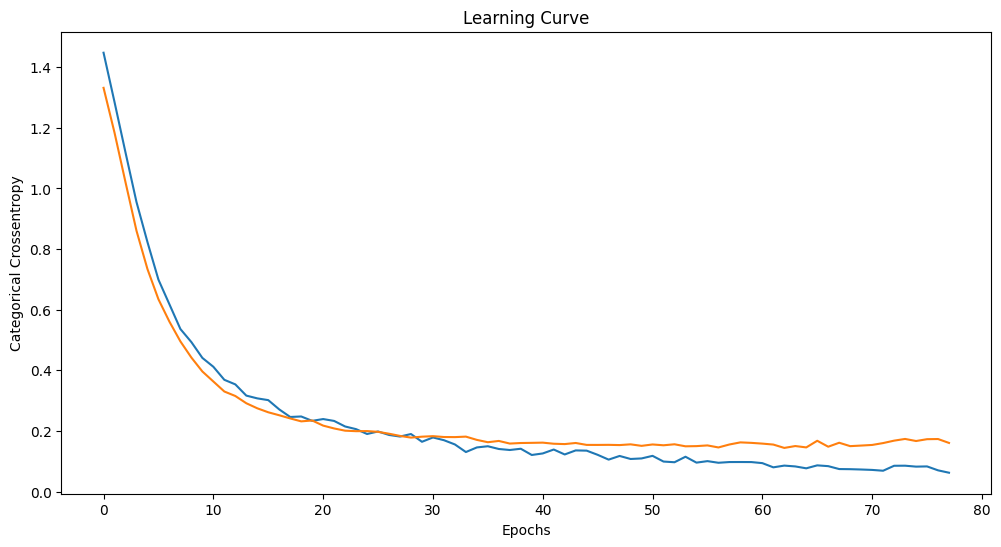

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train_Loss')
plt.plot(hist.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()

### Step 7 : Model evaluation

In [40]:
model.evaluate(xtrain, ytrain_cat)

50/50 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9844


[0.04413910210132599, 0.984375]

In [42]:
model.evaluate(xtest, ytest_cat)

13/13 [==============================] - 0s 3ms/step - loss: 0.1789 - accuracy: 0.9250


[0.1789494901895523, 0.925000011920929]

### Predict the results for train and test

In [43]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

13/13 [==============================] - 0s 2ms/step


In [44]:
yprob_train[0:5]

array([[7.4336191e-07, 9.2601788e-01, 7.3981367e-02, 7.4210620e-12],
       [9.0562918e-25, 3.3028060e-09, 9.6860528e-01, 3.1394664e-02],
       [9.9045473e-01, 9.5452154e-03, 2.9568467e-10, 2.0046832e-32],
       [1.5497637e-27, 8.6921139e-12, 9.8294942e-03, 9.9017054e-01],
       [1.6901882e-04, 9.9831784e-01, 1.5131473e-03, 3.8024817e-15]],
      dtype=float32)

In [45]:
yprob_test[0:5]

array([[9.9896455e-01, 1.0354539e-03, 1.5515168e-12, 0.0000000e+00],
       [1.0090416e-11, 2.5837875e-03, 9.9739611e-01, 2.0067997e-05],
       [9.1996985e-03, 9.9071664e-01, 8.3605664e-05, 1.5333247e-20],
       [3.1974098e-35, 8.7988004e-15, 3.8748354e-04, 9.9961251e-01],
       [2.2440074e-06, 9.9782395e-01, 2.1738170e-03, 5.2875930e-15]],
      dtype=float32)

In [46]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [47]:
ypred_train[0:5]

array([1, 2, 0, 3, 1])

In [48]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [51]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

In [52]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


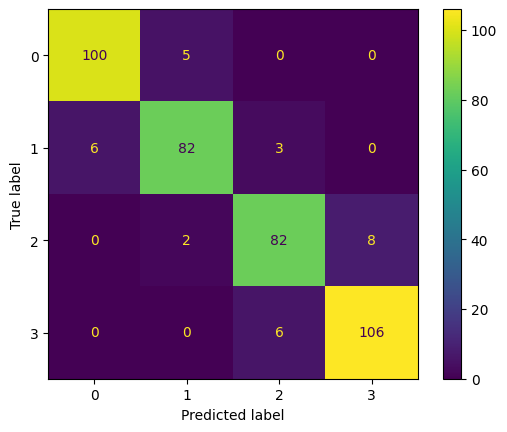

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.92      0.90      0.91        91
           2       0.90      0.89      0.90        92
           3       0.93      0.95      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400



### Because f1 macro score is more than 0.8% hence it is good model

### Out of sample predictions

In [55]:
url2 = "https://raw.githubusercontent.com/vaishaliraut/DeepLearningDemo/main/mobile_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [56]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [57]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [58]:
probs = model.predict(xnew2_pre)

32/32 [==============================] - 0s 2ms/step


In [59]:
probs[0:5]

array([[8.0228178e-30, 3.4620338e-12, 3.3389170e-02, 9.6661079e-01],
       [4.6804655e-38, 2.3509640e-16, 5.8159087e-04, 9.9941838e-01],
       [7.6225370e-23, 7.3310673e-08, 8.0258870e-01, 1.9741119e-01],
       [0.0000000e+00, 1.3166570e-19, 2.9392993e-05, 9.9997056e-01],
       [4.8673703e-04, 9.9863774e-01, 8.7546598e-04, 1.0238971e-14]],
      dtype=float32)

In [61]:
preds = np.argmax(probs, axis=1)
preds[0:5]

array([3, 3, 2, 3, 1])

In [62]:
max_probs = np.max(probs, axis=1)

In [63]:
max_probs[0:5]

array([0.9666108 , 0.9994184 , 0.8025887 , 0.99997056, 0.99863774],
      dtype=float32)

In [64]:
df_final = xnew[['id']]
df_final['price_range_pred'] = preds
df_final['prob'] = max_probs
df_final

,id,price_range_pred,prob
0,1,3,0.966611
1,2,3,0.999418
2,3,2,0.802589
3,4,3,0.999971
4,5,1,0.998638
...,...,...,...
995,996,2,0.985024
996,997,1,0.999617
997,998,0,0.615902
998,999,2,0.998739


In [65]:
df_final['price_range_pred'].value_counts()

price_range_pred
0    264
2    262
3    261
1    213
Name: count, dtype: int64

<Axes: xlabel='price_range_pred'>

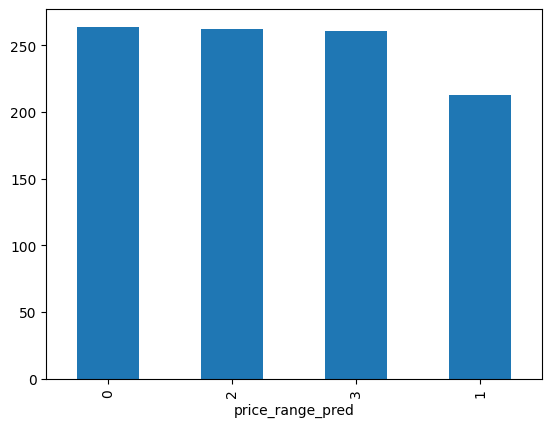

In [67]:
df_final['price_range_pred'].value_counts().plot(kind='bar')

In [68]:
df_final.to_csv("MulticlassClassification_Mobile_Result.csv", index=False)